In [26]:
#!/usr/bin/python3

import sys
import pickle
sys.path.append("../tools/")

import pandas as pd
import numpy as np
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Select what features you'll use.
# features_list is a list of strings, each of which is a feature name.
# The first feature must be "poi".

# By using ExtraTreesClassifier from sklearn we identified 3 features that were
# not contributing much for the model:
#                   loan_advances, director_fees, restricted_stock_deferred
# So we decided to remove these features from the analysis.
np.random.seed(1234)

features_list = ['deferred_income',
                 'expenses',
                 'exercised_stock_options',
                 'restricted_stock',
                 'from_this_person_to_poi',
                 'salary',
                 'total_stock_value',
                 'bonus',
                 'shared_receipt_with_poi',
                 'other',
                 'from_poi_to_this_person',
                 'long_term_incentive',
                 'total_payments',
                 'from_messages',
                 'to_messages',
                 'deferral_payments',
                 'poi']

# Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

# Task 2: Remove outliers
# Generate Dataframe out of the data_dict
df_enron = pd.DataFrame.from_dict(data_dict, orient='index')


# Define columns of features
# df_enron.drop('email_address', axis=1, inplace=True)
#df_enron = df_enron[features_list]

In [27]:
df_enron.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN


In [28]:
# Change columns type to numeric
df_enron = df_enron.apply(pd.to_numeric, errors='coerce')

# Fillna with 0 to replace NaN
df_enron = df_enron.fillna(0.0)

# Rescaling feature values with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_enron.drop('poi', axis=1))
y = df_enron.poi

In [29]:
X

array([[7.56265983e-03, 1.91563800e-01, 9.23453242e-02, ...,
        2.54845137e-01, 2.05415103e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.74544552e-03, ...,
        0.00000000e+00, 1.95934169e-02, 0.00000000e+00],
       [1.78623393e-05, 3.73622021e-02, 3.18462472e-03, ...,
        8.42238725e-02, 3.28153718e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.18462472e-03, ...,
        0.00000000e+00, 1.95934169e-02, 0.00000000e+00],
       [5.93175710e-03, 0.00000000e+00, 3.18462472e-03, ...,
        0.00000000e+00, 4.64969932e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.18462472e-03, ...,
        0.00000000e+00, 1.95934169e-02, 0.00000000e+00]])

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_enron.drop(
                                                           'poi', axis=1).columns)


[0.06536883 0.03388887 0.02059565 0.03835319 0.01155917 0.09785213
 0.         0.00082316 0.08366968 0.09796924 0.04283392 0.07021488
 0.09088855 0.03868146 0.0798469  0.04749414 0.05357948 0.04248256
 0.08248641 0.0014118 ]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
df_features_importance = pd.DataFrame(feat_importances, columns=['values'])

In [32]:
df_features_importance = df_features_importance.sort_values(by='values')

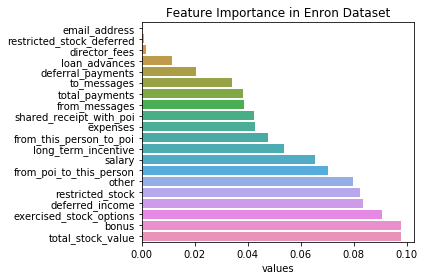

In [33]:
ax = sns.barplot(y=df_features_importance.index, x='values', data=df_features_importance,
           orient='h')
ax.set_title('Feature Importance in Enron Dataset')
plt.tight_layout()
ax.figure.savefig('feature_importance.png', dpi=300, orientation='landscape')

In [34]:
# Define X and y
# X = df_enron.drop('poi', axis=1).values
# y = df_enron['poi'].values

# Using DBSCAN to spot outliers
"""from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
    eps=0.5,
    metric="euclidean",
    min_samples=3,
    n_jobs=-1)
clusters = outlier_detection.fit_predict(X)
df_dbscan = pd.DataFrame(clusters, index=df_enron.index)
#print(df_dbscan[df_dbscan[0] == -1].index)

list_dbscan_outliers = list(df_dbscan[df_dbscan[0] == -1].index)
print(list_dbscan_outliers)
"""
# As mentioned on the report, we applied PCA to define outliers and ended
# finding one sample called "TOTAL" as a candidate outlier
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
dim_red = pca.fit_transform(X)
#print(pca.singular_values_)

# Transform PCA results into Dataframe
pca_df = pd.DataFrame(dim_red, columns=[
    'PCA1', 'PCA2'], index=df_enron.index)

# Concatenate with y series as for labels
pca_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)

# Get z-score for each component
pca_df['PCA1_zscore'] = (pca_df.PCA1 - pca_df.PCA1.mean()) / pca_df.PCA1.std()
pca_df['PCA2_zscore'] = (pca_df.PCA2 - pca_df.PCA2.mean()) / pca_df.PCA2.std()


# Get rows that are 3 standard deviations away from meanlist_outliers_pca
list_outliers_pca = (pca_df[(np.abs(pca_df.PCA1_zscore) > 3)
                            | (np.abs(pca_df.PCA2_zscore) > 3)]).index

In [35]:
pca_df.head()

,PCA1,PCA2,poi,PCA1_zscore,PCA2_zscore
ALLEN PHILLIP K,0.021015,0.194580,False,0.069580,0.702114
BADUM JAMES P,-0.040584,-0.172437,False,-0.134378,-0.622213
BANNANTINE JAMES M,-0.024012,-0.066678,False,-0.079504,-0.240597
BAXTER JOHN C,0.040294,-0.169535,False,0.133416,-0.611740
BAY FRANKLIN R,-0.027090,-0.171985,False,-0.089698,-0.620583


In [36]:
def poi_n_poi(row):
    if row.poi == False:
        return 'non-poi'
    elif row.poi == True:
        return 'poi'
    else:
        return None

pca_df['label'] = pca_df.apply(poi_n_poi, axis=1)

In [37]:
pca_df.loc[list(list_outliers_pca), 'label'] = 'outlier'

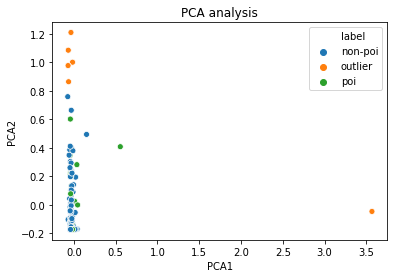

In [38]:
ax = sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label')
ax.set_title('PCA analysis')
ax.figure.savefig('PCA_analysis_plot.png', dpi=300)

In [39]:
df_features_no_outliers = df_enron.drop(list_outliers_pca)
X = df_features_no_outliers.drop('poi', axis=1)
y = df_features_no_outliers.poi

In [40]:
poi_class = df_features_no_outliers['poi'].value_counts()
print(poi_class / df_features_no_outliers.shape[0])

False    0.878571
True     0.121429
Name: poi, dtype: float64


In [41]:
# Spliting data into trainning and testing
from sklearn.model_selection import train_test_split
# Split your data X and y, into a training and a test set and fit the
# pipeline onto the training data
# X_train, X_test, y_train, y_test = train_test_split(None
#    X_resampled,  y_resampled, test_size=0.3,
#    random_state=0)
np.random.seed(1234)

from imblearn.over_sampling import SMOTE
# Define the resampling method
method = SMOTE(kind='regular', random_state=42)

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)


from sklearn.utils import shuffle
X_resampled,  y_resampled = shuffle(X_resampled,  y_resampled)


# Split your data X and y, into a training and a test set and fit the
# pipeline onto the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,  y_resampled, test_size=0.5, random_state=0)


#print(df_enron)
# Task 3: Create new feature(s)
# Store to my_dataset for easy export below.
my_dataset = data_dict

# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys=True)
labels, features = targetFeatureSplit(data)

# Task 4: Try a variety of classifiers
# Please name your classifier clf for easy export below.
# Note that if you want to do PCA or other multi-stage operations,
# you'll need to use Pipelines. For more info:
# http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

print(clf)
print('GaussianNB')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
probs = clf.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

print(clf)
print('RandomForestClassifier')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
probs = clf.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))


from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)

print(clf)
print('LogisticRegression')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
probs = clf.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))


GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB
0.8583156779661016
              precision    recall  f1-score   support

       False       0.55      0.85      0.67        59
        True       0.72      0.36      0.48        64

   micro avg       0.59      0.59      0.59       123
   macro avg       0.63      0.60      0.57       123
weighted avg       0.64      0.59      0.57       123

[[50  9]
 [41 23]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
RandomForestClassifier
0.9615995762711865
              precision    recall  f1-score   support

       False       0.87      0.92      0.89        59
        True  

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [45]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid 
param_grid = {
    'max_depth': [80, 90, 100, 110,150, 200],
    'max_features': [2, 3, 6, 9, 12],
    'min_samples_leaf': [2, 4, 6, 12],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'class_weight': ['balanced','balanced_subsample', {0:1, 1:6}, {0:1, 1:3}] 
}

# Define which model to use
model = RandomForestClassifier()
# Instantiate the grid search model
grid_search_model = GridSearchCV(estimator = model, 
param_grid = param_grid, cv = 5,
n_jobs = -1, scoring='recal', verbose=10)

grid_search_model.fit(X_train, y_train)
print(grid_search_model.best_params_)
print(grid_search_model.best_estimator_)
print(grid_search_model.best_score_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1976s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 180 tas

{'class_weight': 'balanced', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 75}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=80, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=12, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.8844813722862503


[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed:  2.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
from sklearn.ensemble import RandomForestClassifier
'''
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                             max_depth=None, max_features='auto', max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
                             oob_score=False, random_state=42, verbose=0,
                             warm_start=False)
'''
# Recall
clf = RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 6},
            criterion='gini', max_depth=80, max_features=2,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)
'''
# F1
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=80, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=12, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
'''
print(clf)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
probs = clf.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 6},
            criterion='gini', max_depth=80, max_features=2,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)
0.9557733050847459
              precision    recall  f1-score   support

       False       0.97      0.64      0.78        59
        True       0.75      0.98      0.85        64

   micro avg       0.82      0.82      0.82       123
   macro avg       0.86      0.81      0.81       123
weighted avg       0.86      0.82      0.81       123

[[38 21]
 [ 1 63]]


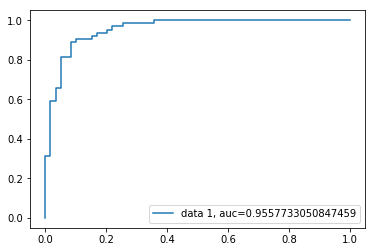

In [58]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

probs = clf.predict_proba(X_test)

AUC: 0.956


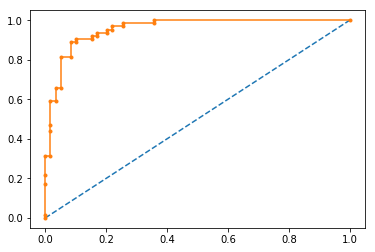

In [60]:
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [24]:
# Task 5: Tune your classifier to achieve better than .3 precision and recall
# using our testing script. Check the tester.py script in the final project
# folder for details on the evaluation method, especially the test_classifier
# function. Because of the small size of the dataset, the script uses
# stratified shuffle split cross validation. For more info:
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
from sklearn.model_selection import StratifiedShuffleSplit
"""
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
for train_index, test_index in sss.split(X_resampled, y_resampled):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                 max_depth=None, max_features='auto', max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
                                 oob_score=False, random_state=None, verbose=0,
                                 warm_start=False)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    probs = clf.predict_proba(X_test)

    # Print the ROC curve, classification report and confusion matrix
    from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
    print(roc_auc_score(y_test, probs[:, 1]))
    print(classification_report(y_test, predicted))
    print(confusion_matrix(y_test, predicted))
"""
# Task 6: Dump your classifier, dataset, and features_list so anyone can
# check your results. You do not need to change anything below, but make sure
# that the version of poi_id.py that you submit can be run on its own and
# generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
0.9615995762711865
              precision    recall  f1-score   support

       False       0.87      0.92      0.89        59
        True       0.92      0.88      0.90        64

   micro avg       0.89      0.89      0.89       123
   macro avg       0.89      0.90      0.89       123
weighted avg       0.90      0.89      0.89       123

[[54  5]
 [ 8 56]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [64]:
## Optimizing using TPOT
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=10, n_jobs=-1)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

30 operators have been imported by TPOT.


HBox(children=(IntProgress(value=0, description='Optimization Progress', max=120, style=ProgressStyle(description_width='initial')), HTML(value='')))

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=2 Unsupported set of arguments: The combination of

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
